<a href="https://colab.research.google.com/github/philjaycee/ML---CAP430/blob/main/Prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
df3 = pd.read_csv('virufy_cdf_coughvid3.csv')

In [ ]:
df3

,source,patient_id,respiratory_rate(per_minute),partial_pressure_02,age,biological_sex,reported_gender,submission_date,respiratory_condition,fever_or_muscle_pain,pcr_test_result_inferred
0,coughvid,2a3d201f-7c70-449c-adc5-50de728fccd0,21,368,38.0,male,male,2020-04-09T20:56:01.725275+00:00,False,False,negative
1,coughvid,68d5215b-afdb-4b7a-81d3-fbd5677de7b4,20,310,46.0,male,male,2020-11-26T16:21:47.764016+00:00,False,False,negative
2,coughvid,3449851d-799e-404e-b143-58e852332948,17,378,47.0,male,male,2020-04-14T19:39:05.755132+00:00,False,False,negative
3,coughvid,0c35e382-31cd-42cb-bc87-8a84b9c52a41,28,332,27.0,female,female,2020-04-13T09:11:44.729740+00:00,False,False,positive
4,coughvid,cdd18865-400a-448e-902b-c8b53644a1c8,16,346,24.0,male,male,2020-11-28T20:14:22.235183+00:00,False,False,negative
...,...,...,...,...,...,...,...,...,...,...,...
10139,coughvid,f9a73dc7-95c6-4e96-9f48-e9d3d9db818b,24,286,33.0,male,male,2020-07-10T06:30:49.755996+00:00,False,False,negative
10140,coughvid,ccc3b8b2-8c07-4aaa-adad-f8304402ecc1,28,393,24.0,male,male,2020-04-09T22:52:43.174014+00:00,False,False,negative
10141,coughvid,864e1796-6fcb-4b60-b79b-b103c5a49729,16,361,45.0,male,male,2020-04-13T07:33:34.920325+00:00,False,False,negative
10142,coughvid,ea14155e-a4bf-4cfb-89bd-0f2c7cae0a33,33,303,50.0,male,male,2020-11-27T15:19:35.847930+00:00,False,False,negative


In [ ]:
#Perlu data positif aja 
df3 = df3[df3['pcr_test_result_inferred'] == 'positive']

In [ ]:
df3

,source,patient_id,respiratory_rate(per_minute),partial_pressure_02,age,biological_sex,reported_gender,submission_date,respiratory_condition,fever_or_muscle_pain,pcr_test_result_inferred
3,coughvid,0c35e382-31cd-42cb-bc87-8a84b9c52a41,28,332,27.0,female,female,2020-04-13T09:11:44.729740+00:00,False,False,positive
16,coughvid,9b58b701-9384-4216-ab49-c6373b6dd8b4,32,259,1.0,female,female,2020-04-13T15:52:24.365925+00:00,False,False,positive
26,coughvid,022a0675-b459-479b-85ed-c88529ad9a29,19,299,26.0,other,other,2020-04-13T15:20:12.426920+00:00,True,True,positive
31,coughvid,2d28744c-a394-438b-8999-054224419c26,32,371,40.0,male,male,2020-04-14T15:04:24.762414+00:00,True,True,positive
57,coughvid,f4e4e818-c210-4c9e-bdca-c1cf1af1e144,25,379,18.0,female,female,2020-04-14T07:14:14.317059+00:00,False,False,positive
...,...,...,...,...,...,...,...,...,...,...,...
10054,coughvid,bd49cde6-52cc-48cb-8e59-3ff65a5bbb3d,32,343,43.0,female,female,2020-10-19T07:09:28.053697+00:00,False,False,positive
10068,coughvid,b60e7ee3-64c2-4982-8212-750b4dbe8c66,33,251,53.0,male,male,2020-04-10T22:49:12.134448+00:00,False,False,positive
10090,coughvid,d994f7f6-43cc-445b-8634-ff3c038ffd53,17,320,47.0,female,female,2020-05-23T04:12:58.127087+00:00,False,False,positive
10111,coughvid,83e76c73-4e06-4e49-ae0d-354e2974745f,20,329,27.0,male,male,2020-04-13T23:17:30.601580+00:00,False,True,positive


In [ ]:
df3['gender_encod']  = pd.factorize(df3.biological_sex)[0]
df3['respi_con_encoding']  = pd.factorize(df3.respiratory_condition)[0]
df3['fever_muscle_encod']  = pd.factorize(df3.fever_or_muscle_pain)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df3
df5 = df3[['biological_sex','respiratory_condition','fever_or_muscle_pain',]]

,source,patient_id,respiratory_rate(per_minute),partial_pressure_02,age,biological_sex,reported_gender,submission_date,respiratory_condition,fever_or_muscle_pain,pcr_test_result_inferred,gender_encod,respi_con_encoding,fever_muscle_encod
3,coughvid,0c35e382-31cd-42cb-bc87-8a84b9c52a41,28,332,27.0,female,female,2020-04-13T09:11:44.729740+00:00,False,False,positive,0,0,0
16,coughvid,9b58b701-9384-4216-ab49-c6373b6dd8b4,32,259,1.0,female,female,2020-04-13T15:52:24.365925+00:00,False,False,positive,0,0,0
26,coughvid,022a0675-b459-479b-85ed-c88529ad9a29,19,299,26.0,other,other,2020-04-13T15:20:12.426920+00:00,True,True,positive,1,1,1
31,coughvid,2d28744c-a394-438b-8999-054224419c26,32,371,40.0,male,male,2020-04-14T15:04:24.762414+00:00,True,True,positive,2,1,1
57,coughvid,f4e4e818-c210-4c9e-bdca-c1cf1af1e144,25,379,18.0,female,female,2020-04-14T07:14:14.317059+00:00,False,False,positive,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10054,coughvid,bd49cde6-52cc-48cb-8e59-3ff65a5bbb3d,32,343,43.0,female,female,2020-10-19T07:09:28.053697+00:00,False,False,positive,0,0,0
10068,coughvid,b60e7ee3-64c2-4982-8212-750b4dbe8c66,33,251,53.0,male,male,2020-04-10T22:49:12.134448+00:00,False,False,positive,2,0,0
10090,coughvid,d994f7f6-43cc-445b-8634-ff3c038ffd53,17,320,47.0,female,female,2020-05-23T04:12:58.127087+00:00,False,False,positive,0,0,0
10111,coughvid,83e76c73-4e06-4e49-ae0d-354e2974745f,20,329,27.0,male,male,2020-04-13T23:17:30.601580+00:00,False,True,positive,2,0,1


In [ ]:
df3 = df3[['respiratory_rate(per_minute)', 'partial_pressure_02','age','gender_encod','respi_con_encoding','fever_muscle_encod']].fillna(0.0).astype(int)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 3 to 10114
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   respiratory_rate(per_minute)  767 non-null    int64
 1   partial_pressure_02           767 non-null    int64
 2   age                           767 non-null    int64
 3   gender_encod                  767 non-null    int64
 4   respi_con_encoding            767 non-null    int64
 5   fever_muscle_encod            767 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [ ]:
df3.describe()

,respiratory_rate(per_minute),partial_pressure_02,age,gender_encod,respi_con_encoding,fever_muscle_encod
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,25.182529,322.365059,33.505867,1.242503,0.346806,0.284224
std,5.671886,44.208410,16.084540,0.955194,0.476264,0.451338
min,16.000000,250.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,284.000000,22.000000,0.000000,0.000000,0.000000
50%,25.000000,320.000000,31.000000,2.000000,0.000000,0.000000
75%,30.000000,362.000000,43.000000,2.000000,1.000000,1.000000
max,35.000000,400.000000,102.000000,2.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
data = df3
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

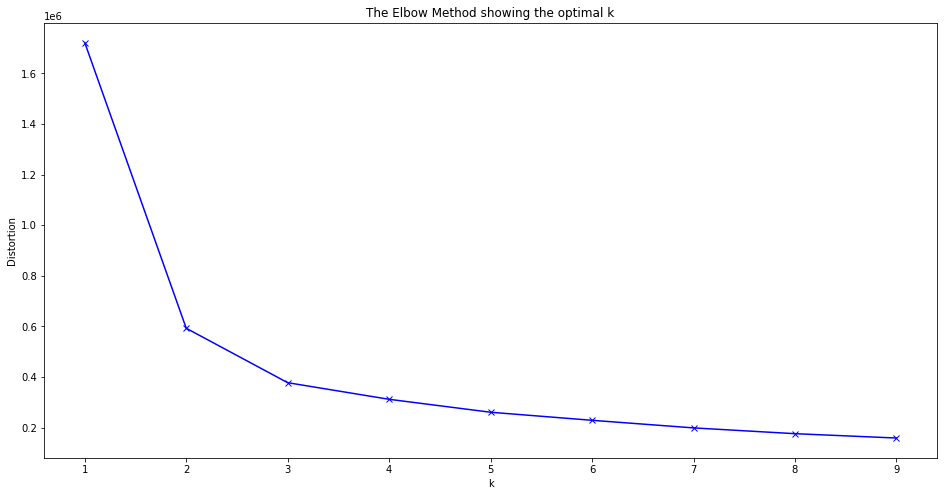

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters = 4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_cluster = km.fit_predict(df3[['respiratory_rate(per_minute)', 'partial_pressure_02','age','gender_encod','respi_con_encoding','fever_muscle_encod']])
y_cluster

array([3, 1, 2, 0, 0, 3, 3, 1, 2, 3, 2, 0, 0, 3, 3, 3, 1, 2, 0, 1, 3, 2,
       0, 1, 3, 2, 2, 3, 1, 0, 2, 2, 0, 0, 1, 0, 3, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 3, 2, 2, 0, 3, 1, 0, 2, 2, 1, 2, 3, 3, 1, 0, 0, 1, 3, 1, 3,
       0, 1, 1, 0, 1, 3, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 1, 2, 1, 0, 1, 0,
       0, 0, 3, 3, 2, 1, 2, 0, 2, 0, 1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 0, 2,
       2, 0, 3, 1, 0, 2, 3, 2, 3, 3, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1,
       3, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 3, 3, 1, 0, 1, 1, 3, 2, 1,
       1, 1, 2, 3, 3, 3, 2, 2, 1, 1, 1, 0, 0, 0, 1, 3, 3, 1, 3, 0, 2, 2,
       1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 3, 0, 3, 2, 2,
       2, 3, 3, 0, 0, 2, 3, 0, 2, 0, 1, 1, 2, 2, 2, 1, 3, 2, 0, 3, 0, 2,
       0, 1, 3, 2, 3, 0, 2, 0, 3, 3, 3, 0, 2, 0, 3, 1, 3, 2, 2, 1, 1, 1,
       1, 3, 1, 3, 1, 2, 3, 3, 0, 3, 1, 1, 0, 3, 2, 0, 1, 2, 1, 0, 2, 3,
       3, 3, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 3, 0, 0, 1, 0,
       3, 2, 2, 1, 0, 1, 1, 2, 0, 2, 3, 0, 3, 3, 2,

In [ ]:
df3['cluter'] = y_cluster
df3.head(50)

,respiratory_rate(per_minute),partial_pressure_02,age,gender_encod,respi_con_encoding,fever_muscle_encod,cluter
3,28,332,27,0,0,0,3
16,32,259,1,0,0,0,1
26,19,299,26,1,1,1,2
31,32,371,40,2,1,1,0
57,25,379,18,0,0,0,0
61,25,335,49,2,0,0,3
77,22,341,39,2,0,0,3
78,21,275,43,2,1,1,1
82,16,302,22,2,1,1,2
92,33,351,29,2,0,0,3


In [ ]:
df3

,respiratory_rate(per_minute),partial_pressure_02,age,gender_encod,respi_con_encoding,fever_muscle_encod,cluter
3,28,332,27,0,0,0,3
16,32,259,1,0,0,0,1
26,19,299,26,1,1,1,2
31,32,371,40,2,1,1,0
57,25,379,18,0,0,0,0
...,...,...,...,...,...,...,...
10054,32,343,43,0,0,0,3
10068,33,251,53,2,0,0,1
10090,17,320,47,0,0,0,2
10111,20,329,27,2,0,1,3


In [ ]:
#melakukan randomisasi
# 0 = 1 hari , 1 = 2 hari, 2 = 3 hari
df5 = df3.sample(frac=1).reset_index(drop=True)
df5

,respiratory_rate(per_minute),partial_pressure_02,age,gender_encod,respi_con_encoding,fever_muscle_encod,cluter
0,29,381,49,0,0,0,0
1,26,339,40,2,1,1,3
2,18,292,28,2,1,0,2
3,32,301,20,2,0,0,2
4,16,398,35,2,1,1,0
...,...,...,...,...,...,...,...
762,27,342,18,0,1,1,3
763,17,328,51,2,1,1,3
764,29,378,23,2,0,0,0
765,16,268,22,2,0,0,1


In [ ]:
df5

,respiratory_rate(per_minute),partial_pressure_02,age,gender_encod,respi_con_encoding,fever_muscle_encod,cluter
0,29,381,49,0,0,0,0
1,26,339,40,2,1,1,3
2,18,292,28,2,1,0,2
3,32,301,20,2,0,0,2
4,16,398,35,2,1,1,0
...,...,...,...,...,...,...,...
762,27,342,18,0,1,1,3
763,17,328,51,2,1,1,3
764,29,378,23,2,0,0,0
765,16,268,22,2,0,0,1


In [ ]:
target = df5.pop('cluter')

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((df5.values, target.values))

In [ ]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 29 381  49   0   0   0], Target: 0
Features: [ 26 339  40   2   1   1], Target: 3
Features: [ 18 292  28   2   1   0], Target: 2
Features: [ 32 301  20   2   0   0], Target: 2
Features: [ 16 398  35   2   1   1], Target: 0


In [ ]:
train_dataset = dataset.shuffle(len(df5)).batch(1)

In [ ]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

Epoch 1/15
767/767 [==============================] - 1s 1ms/step - loss: -156.6059 - accuracy: 0.2660
Epoch 2/15
767/767 [==============================] - 1s 1ms/step - loss: -1358.2435 - accuracy: 0.2581
Epoch 3/15
767/767 [==============================] - 1s 1ms/step - loss: -5313.8442 - accuracy: 0.2581
Epoch 4/15
767/767 [==============================] - 1s 1ms/step - loss: -12768.1787 - accuracy: 0.2581
Epoch 5/15
767/767 [==============================] - 1s 1ms/step - loss: -24215.1211 - accuracy: 0.2581
Epoch 6/15
767/767 [==============================] - 1s 1ms/step - loss: -40050.4453 - accuracy: 0.2581
Epoch 7/15
767/767 [==============================] - 1s 1ms/step - loss: -60665.5508 - accuracy: 0.2581
Epoch 8/15
767/767 [==============================] - 1s 1ms/step - loss: -86266.0078 - accuracy: 0.2581
Epoch 9/15
767/767 [==============================] - 1s 1ms/step - loss: -117423.7188 - accuracy: 0.2581
Epoch 10/15
767/767 [==============================] - 1s 

In [ ]:
model.predict([ [29  381  49   0   0   0]])

SyntaxError: ignored

In [ ]:
train_df, validate_df = train_test_split(df5, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

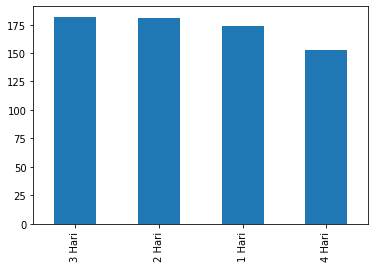

In [ ]:
train_df['cluter'].value_counts().plot.bar()

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(6,  activation = 'relu'),
      tf.keras.layers.Dense(4, activation = 'relu'),
      tf.keras.layers.Dense(4, activation='relu'),
])


model.summary()

ValueError: ignored